## CFChemDb & RDKTools demo - cheminformatics db and development system

Jeremy Yang

Common Fund Data Ecosystem (CFDE)

* https://github.com/nih-cfde
* https://github.com/unmtransinfo/CFChemDb
* https://github.com/jeremyjyang/rdkit-tools

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn3

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import rdktools
import rdktools.db
import rdktools.util

In [21]:
dbcon = rdktools.util.db.Connect("unmtid-dbs.net", 5442, "cfchemdb", "commoner", "easement")

In [3]:
rdktools.util.db.ListTablesRowCounts(dbcon)

,schema,table,rowcount
0,public,drugcentral,4713
0,public,glygen,33531
0,public,idg,251677
0,public,lincs,32469
0,public,meta,1
0,public,mols,311041
0,public,properties,311041
0,public,refmet,154676
0,public,reprotox,965


In [4]:
rdktools.util.db.ListColumns(dbcon)

,schema,table,column_name,data_type
0,public,drugcentral,id,character varying
1,public,drugcentral,name,character varying
2,public,drugcentral,cas_reg_no,character varying
3,public,drugcentral,smiles,character varying
4,public,drugcentral,inchikey,character varying
...,...,...,...,...
2,public,reprotox,pubchem_cid,character varying
3,public,reprotox,smiles,character varying
4,public,reprotox,term,character varying
5,public,reprotox,cansmi,character varying


### Example data from each dataset

* __IDG__

In [5]:
idg_sample = pd.read_sql("SELECT * FROM idg WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
idg_sample

,pubchem_cid,smiles,target_count,activity_count,cansmi,mol_id,name
0,89773146,COc1ccccc1Nc2nc(Nc3ccc(cc3OC)N4CCC(CC4)N5CCN(C...,3,3,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,204620,SCHEMBL15217790
1,58303709,CN(C)CC(C)(C)COc1cccc2ccc(nc12)c3nnc4ccccn34,1,2,CN(C)CC(C)(C)COc1cccc2ccc(-c3nnc4ccccn34)nc12,147867,SCHEMBL1966509
2,89734221,CC[C@@H](NC(=O)c1cc(C(=O)N2CCC[C@@H]2C)c3COCCn...,1,1,CC[C@@H](NC(=O)c1cc(C(=O)N2CCC[C@@H]2C)c2n1CCO...,204087,SCHEMBL15166408
3,53321614,Cc1cc(Nc2nc(nn3cccc23)N4CCN(CC4)C(=O)Cc5ccccc5...,1,1,Cc1cc(Nc2nc(N3CCN(C(=O)Cc4ccccc4)CC3)nn3cccc23...,128523,SCHEMBL1711047
4,45481790,COC(=O)[C@@H]1C2CCC(C[C@@H]1c3ccc(SC(C)C)cc3)N2C,3,3,COC(=O)[C@@H]1C2CCC(C[C@@H]1c1ccc(SC(C)C)cc1)N2C,111020,CHEMBL579254
5,10072430,Cc1onc2c1C(=O)N([C@H]3CCC[C@@H](CNC(=O)c4ccccc...,1,1,Cc1onc2c1c(=O)n([C@H]1CCC[C@@H](CNC(=O)c3ccccc...,19764,CID10072430


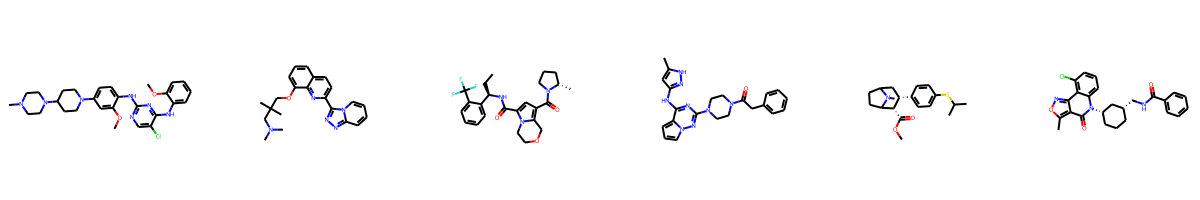

In [6]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in idg_sample.cansmi], molsPerRow=6)

* __DrugCentral__

In [7]:
drugcentral_sample = pd.read_sql("SELECT * FROM drugcentral WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
drugcentral_sample

,id,name,cas_reg_no,smiles,inchikey,inchi,formula,molweight,cansmi,mol_id
0,2094,pentifylline,1028-33-7,CCCCCCN1C(=O)N(C)C2=C(N(C)C=N2)C1=O,MRWQRJMESRRJJB-UHFFFAOYSA-N,InChI=1S/C13H20N4O2/c1-4-5-6-7-8-17-12(18)10-1...,C13H20N4O2,264.329,CCCCCCn1c(=O)c2c(ncn2C)n(C)c1=O,309852
1,2401,ronifibrate,42597-57-9,CC(C)(OC1=CC=C(Cl)C=C1)C(=O)OCCCOC(=O)C1=CN=CC=C1,AYJVGKWCGIYEAK-UHFFFAOYSA-N,"InChI=1S/C19H20ClNO5/c1-19(2,26-16-8-6-15(20)7...",C19H20ClNO5,377.820,CC(C)(Oc1ccc(Cl)cc1)C(=O)OCCCOC(=O)c1cccnc1,308865
2,1825,moclobemide,71320-77-9,ClC1=CC=C(C=C1)C(=O)NCCN1CCOCC1,YHXISWVBGDMDLQ-UHFFFAOYSA-N,InChI=1S/C13H17ClN2O2/c14-12-3-1-11(2-4-12)13(...,C13H17ClN2O2,268.740,O=C(NCCN1CCOCC1)c1ccc(Cl)cc1,996
3,3481,podophyllotoxin,518-28-5,COC1=CC(=CC(OC)=C1OC)[C@H]1[C@@H]2[C@H](COC2=O...,YJGVMLPVUAXIQN-XVVDYKMHSA-N,InChI=1S/C22H22O8/c1-25-16-4-10(5-17(26-2)21(1...,C22H22O8,414.410,COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...,1645
4,1329,granisetron,109889-09-0,CN1N=C(C(=O)N[C@@H]2C[C@@H]3CCC[C@H](C2)N3C)C2...,MFWNKCLOYSRHCJ-BTTYYORXSA-N,InChI=1S/C18H24N4O/c1-21-13-6-5-7-14(21)11-12(...,C18H24N4O,312.417,CN1[C@H]2CCC[C@@H]1C[C@H](NC(=O)c1nn(C)c3ccccc...,252248
5,1077,ethaverine,486-47-5,CCOC1=C(OCC)C=C(CC2=NC=CC3=CC(OCC)=C(OCC)C=C23...,ZOWYFYXTIWQBEP-UHFFFAOYSA-N,InChI=1S/C24H29NO4/c1-5-26-21-10-9-17(14-22(21...,C24H29NO4,395.499,CCOc1ccc(Cc2nccc3cc(OCC)c(OCC)cc23)cc1OCC,731


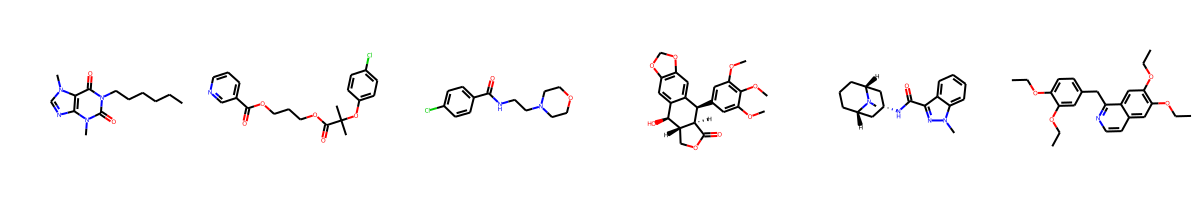

In [8]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in drugcentral_sample.cansmi], molsPerRow=6)

* __LINCS__

In [9]:
lincs_sample = pd.read_sql("SELECT * FROM lincs WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
lincs_sample

,id,pert_name,target,moa,smiles,inchi_key,compound_aliases,sig_count,cansmi,mol_id
0,BRD-K76665741,BRD-K76665741,None,None,Cc1ccc(cc1)S(=O)(=O)N1C[C@H](O)COC[C@H]2O[C@H]...,HNAQDDNENYJUKU-VCWGXOKSSA-N,None,6,Cc1ccc(S(=O)(=O)N2C[C@H](O)COC[C@H]3O[C@H](CC(...,262841
1,BRD-K22988729,BRD-K22988729,None,None,CCCC(=O)Nc1ccc2OC[C@H](C)N(Cc3ccccc3F)C[C@@H](...,None,None,1,CCCC(=O)Nc1ccc2c(c1)C(=O)N(C)C[C@@H](OC)[C@H](...,253406
2,BRD-K03606830,BRD-K03606830,None,None,COc1ccc(cc1)-c1cnc2O[C@H](CN(C)C(=O)Cc3cccnc3)...,None,None,1,COc1ccc(-c2cnc3c(c2)C(=O)N([C@H](C)CO)C[C@H](C...,253456
3,BRD-K97884852,malotilate,None,None,CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1,YPIQVCUJEKAZCP-UHFFFAOYSA-N,None,168,CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1,257469
4,BRD-K07653295,BRD-K07653295,None,None,Cc1[n+](C)ccc2ccccc12,AJUWFPYSMJNTEP-UHFFFAOYSA-N,None,12,Cc1c2ccccc2cc[n+]1C,261449
5,BRD-K05970499,BRD-K05970499,None,None,C[C@@H](CO)N1C[C@H](C)[C@H](CN(C)S(=O)(=O)c2cc...,None,None,1,C[C@H]1CN([C@@H](C)CO)C(=O)CCCn2cc(nn2)CO[C@H]...,275320


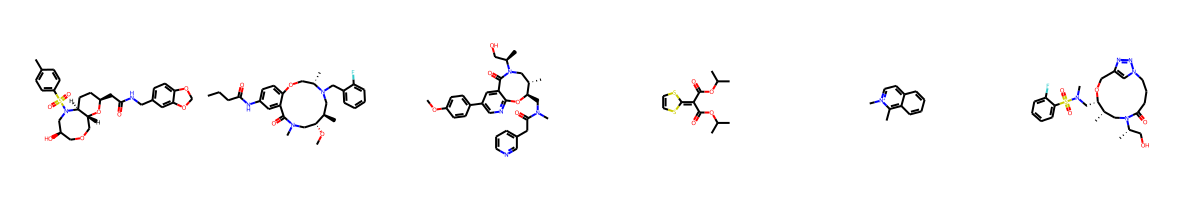

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in lincs_sample.cansmi], molsPerRow=6)

* __RefMet__

In [11]:
refmet_sample = pd.read_sql("SELECT * FROM refmet WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
refmet_sample

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid,cansmi,mol_id
0,10-HDoHE,Fatty Acyls,Docosanoids,Docosanoids,C22H32O3,344.23514500000005,DDCYKEYDTGCKAS-SKSHMZPZSA-N,CC/C=C\C/C=C\C/C=C\C=C\C(O)C/C=C\C/C=C\CCC(O)=O,11537494,CC/C=C\C/C=C\C/C=C\C=C\C(O)C/C=C\C/C=C\CCC(=O)O,290590
1,Lys-Lys-Met,Organic acids,Amino acids and peptides,Tripeptides,C17H35N5O4S,405.240977,KJIXWRWPOCKYLD-IHRRRGAJSA-N,CSCC[C@@H](NC(=O)[C@@H](CCCCN)NC(=O)[C@H](N)CC...,145456718,CSCC[C@@H](NC(=O)[C@@H](CCCCN)NC(=O)[C@H](N)CC...,286218
2,Phe-Phe-Val,Organic acids,Amino acids and peptides,Tripeptides,C23H29N3O4,411.215807,GRVMHFCZUIYNKQ-UFYCRDLUSA-N,CC(C)[C@@H](NC(=O)[C@@H](Cc1ccccc1)NC(=O)[C@H]...,102144079,CC(C)[C@@H](NC(=O)[C@@H](Cc1ccccc1)NC(=O)[C@H]...,278002
3,Macluraxanthone,Organoheterocyclic compounds,Benzopyrans,1-benzopyrans,C23H22O6,394.14164,XRVLGJCHUWXTDX-UHFFFAOYSA-N,CC1(C)C=Cc2c(O1)c(c1Oc3c(ccc(O)c3O)C(=O)c1c2O)...,5281646,C=CC(C)(C)c1c2c(c(O)c3c(=O)c4ccc(O)c(O)c4oc13)...,286726
4,Neamine,Organic oxygen compounds,Organooxygen compounds,Organooxygen compounds,C12H26N4O6,322.18523500000003,SYJXFKPQNSDJLI-HKEUSBCWSA-N,NC[C@@H]1O[C@@H](O[C@@H]2[C@@H](O)[C@H](O)[C@@...,72392,NC[C@@H]1O[C@@H](O[C@@H]2[C@@H](O)[C@H](O)[C@@...,284037
5,2-Hydroxyphenylacetic acid,Benzenoids,Phenylacetic acids,Phenylacetic acids,C8H8O3,152.047345,IWYDHOAUDWTVEP-SSDOTTSWSA-N,OC(=O)[C@@H](O)c1ccccc1 |&1:3|,11914,O=C(O)[C@@H](O)c1ccccc1,290447


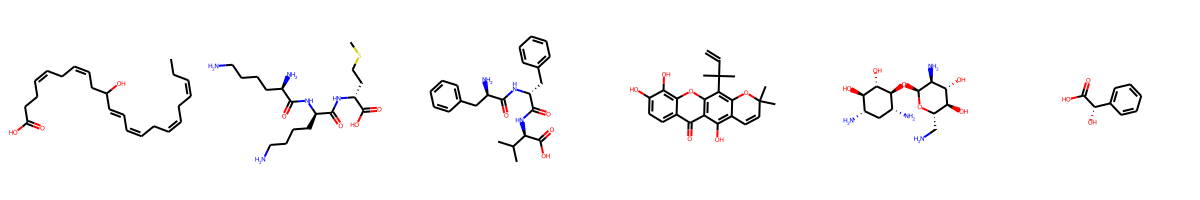

In [12]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in refmet_sample.cansmi], molsPerRow=6)

* __GlyGen__

In [13]:
glygen_sample = pd.read_sql("SELECT * FROM glygen WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
glygen_sample

,glycan_type,mass_pme,number_monosaccharides,fully_determined,wurcs,byonic,glytoucan_ac,missing_score,glycam,inchi,...,smiles,mass,glygen_id,inchi_key,glytoucan_id,pubchem_cid,pubchem_sid,chebi_id,cansmi,mol_id
0,Saccharide,250.14,1,yes,"WURCS=2.0/1,1,0/[a2121h-1a_1-5]/1/",nan,G24050VV,0,LIdopa1-OH,InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2...,...,C([C@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O)O)O)O)O,180.06,26741,WQZGKKKJIJFFOK-DSOBHZJASA-N,G24050VV,6992021.0,252286351.0,59552.0,OC[C@@H]1O[C@@H](O)[C@H](O)[C@@H](O)[C@@H]1O,307647
1,Saccharide,641.33,2,yes,"WURCS=2.0/2,2,1/[a2112h-1b_1-5][Aad21122h-2a_2...",Hex(1)NeuGc(1) % 487.153719465,G38557KR,0,nan,InChI=1S/C17H29NO15/c19-2-6(23)10(25)13-9(18-8...,...,C1[C@@H]([C@H]([C@@H](O[C@]1(C(=O)O)O[C@H]2[C@...,487.15,28018,XGGMLCCNKNCBRK-ZRZROYMQSA-N,G38557KR,91862920.0,252297243.0,150310.0,O=C(CO)N[C@@H]1[C@@H](O)C[C@](O[C@H]2[C@@H](O)...,304188
2,Topology,206.12,1,yes,"WURCS=2.0/1,1,0/[o222h]/1/",nan,G55614WT,0,nan,"InChI=1S/C5H10O5/c6-1-3(8)5(10)4(9)2-7/h1,3-5,...",...,C([C@H]([C@H]([C@H](C=O)O)O)O)O,150.05,4419,PYMYPHUHKUWMLA-LMVFSUKVSA-N,G55614WT,5311110.0,252286465.0,47014.0,O=C[C@H](O)[C@H](O)[C@H](O)CO,304387
3,Saccharide,220.13,1,yes,"WURCS=2.0/1,1,0/[a1122m-1a_1-5]/1/",nan,G20386CD,0,DRhapa1-OH,InChI=1S/C6H12O5/c1-2-3(7)4(8)5(9)6(10)11-2/h2...,...,C[C@@H]1[C@H]([C@@H]([C@@H]([C@H](O1)O)O)O)O,164.07,23969,SHZGCJCMOBCMKK-PQMKYFCFSA-N,G20386CD,439548.0,252297054.0,63152.0,C[C@H]1O[C@H](O)[C@@H](O)[C@@H](O)[C@@H]1O,299099
4,Saccharide,424.23,2,yes,"WURCS=2.0/2,2,1/[a1221m-1a_1-5][a2112h-1a_1-5]...",Hex(1)dHex(1) % 326.12129707,G70732AH,0,DGalpa1-4LFucpa1-OH,InChI=1S/C12H22O10/c1-3-10(7(16)8(17)11(19)20-...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O)O)O)O[C@...,326.12,18516,VFLUXFSSKVKHEL-PHZJKCIESA-N,G70732AH,91845600.0,252276517.0,153535.0,C[C@@H]1O[C@@H](O)[C@@H](O)[C@H](O)[C@@H]1O[C@...,305759
5,Saccharide,2378.21,10,nan,"WURCS=2.0/7,10,9/[a2122h-1x_1-5_2*NCC/3=O][a21...",Hex(4)HexNAc(4)dHex(1)NeuAc(1) % 1915.69267463,G96896RL,69,nan,InChI=1S/C73H121N5O53/c1-17-38(93)49(104)52(10...,...,C[C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)OC[C@@H]2[...,1915.69,23727,LTMDBRHBZUWPGI-KKUOTYQFSA-N,G96896RL,91853977.0,252286495.0,155789.0,CC(=O)N[C@H]1C(O)O[C@H](CO[C@@H]2O[C@@H](C)[C@...,301264


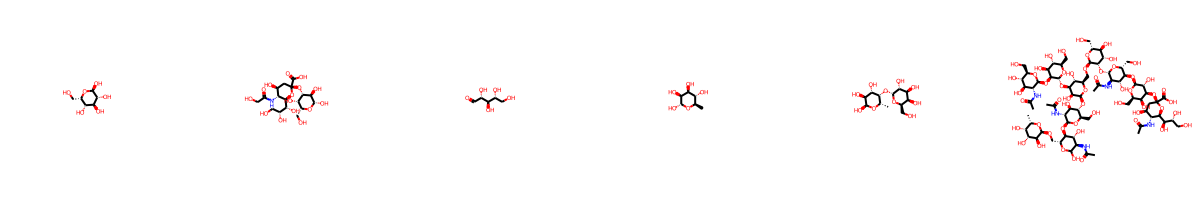

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in glygen_sample.cansmi], molsPerRow=6)

* __ReproTox__

In [15]:
reprotox_sample = pd.read_sql("SELECT * FROM reprotox WHERE cansmi IS NOT NULL ORDER BY RANDOM() LIMIT 6", dbcon)
reprotox_sample

,ls_id,cas_rn,pubchem_cid,smiles,term,cansmi,mol_id
0,LS-1181,31508-00-6,35823,Clc1ccc(cc1Cl)-c1cc(Cl)c(Cl)cc1Cl,CNS,Clc1ccc(-c2cc(Cl)c(Cl)cc2Cl)cc1Cl,296198
1,LS-125796,17780-72-2,4380,CN(CCCOc1ccc(Cl)cc1Cl)CC#C,CNS,C#CCN(C)CCCOc1ccc(Cl)cc1Cl,243
2,LS-140,50-35-1,5426,O=C1N(C2CCC(=O)NC2=O)C(=O)c2ccccc12,CNS,O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)N1,256394
3,LS-1568,67-68-5,679,CS(C)=O,CNS,CS(C)=O,289560
4,LS-109152,484-23-1,10230,NNc1nnc(NN)c2ccccc12,CV,NNc1nnc(NN)c2ccccc12,310716
5,LS-764,133-06-2,8606,ClC(Cl)(Cl)SN1C(=O)C2CC=CCC2C1=O,CNS,O=C1C2CC=CCC2C(=O)N1SC(Cl)(Cl)Cl,310774


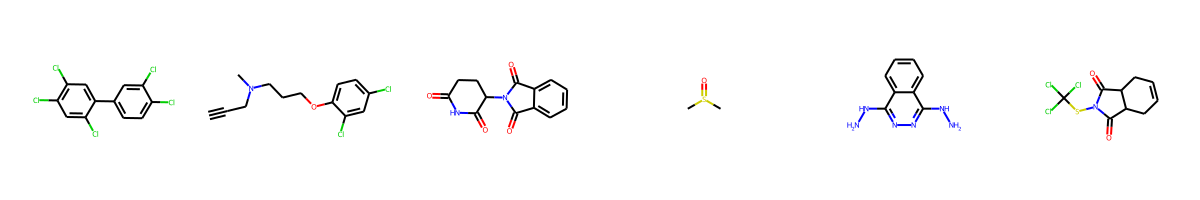

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in reprotox_sample.cansmi], molsPerRow=6)

### Chemical similarity search

In [17]:
hits = rdktools.db.MolSimilaritySearch("NCCc1cc(O)c(O)cc1", "mols", dbcon)
hits.head(12)

,cansmi,name,tanimoto
0,NCCc1ccc(O)c(O)c1,Dophamine,1.000000
1,NCCc1ccc(O)c(O)c1,None,1.000000
2,Cl.NCCc1ccc(O)c(O)c1,CID517540,1.000000
3,NCCc1cc(O)c(O)c(O)c1,None,0.921986
4,NCCc1cccc(O)c1,None,0.853846
5,CC(=O)NCCc1ccc(O)c(O)c1,None,0.817610
6,OCCc1ccc(O)c(O)c1,None,0.784722
7,Cl.NCCc1cc(O)c(O)cc1O,None,0.778443
8,NCCc1cc(O)c(O)cc1O,Topamine,0.778443
9,O=CCc1ccc(O)c(O)c1,None,0.773973


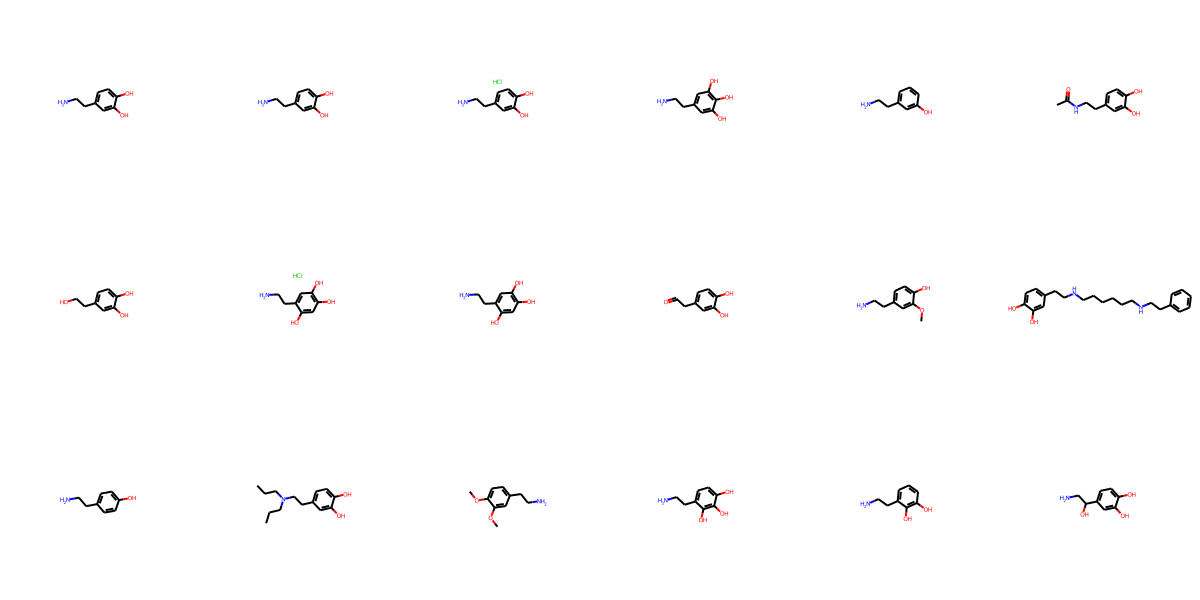

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in hits.cansmi[:18]], molsPerRow=6)

## Cansmi commonality

Comparing datasets by canonical SMILES.

In [22]:
cansmis={};
for table in ("idg", "drugcentral", "lincs", "glygen", "refmet", "reprotox"):
  cansmis[table] = set(pd.read_sql(f"SELECT DISTINCT cansmi FROM {table} WHERE cansmi IS NOT NULL", dbcon)["cansmi"])
  print(f"{table:>12}: {len(cansmis[table]):6d} cansmis")

         idg: 249512 cansmis
 drugcentral:   4097 cansmis
       lincs:  26821 cansmis
      glygen:   9695 cansmis
      refmet:  23114 cansmis
    reprotox:    698 cansmis


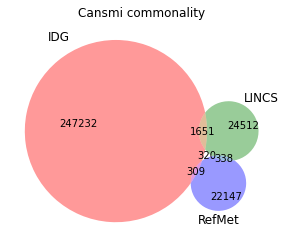

In [23]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["refmet"]], ('IDG', 'LINCS', 'RefMet'), set_colors=("r", "g", "b"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

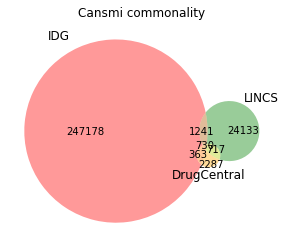

In [24]:
v3 = venn3([cansmis["idg"], cansmis["lincs"], cansmis["drugcentral"]], ('IDG', 'LINCS', 'DrugCentral'), set_colors=("r", "g", "orange"), alpha=0.4)
plt.title("Cansmi commonality")
plt.show()

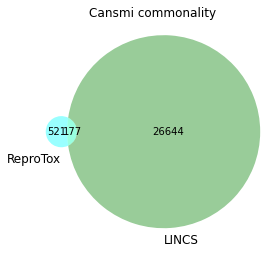

In [25]:
plt.figure(figsize=(8,4))
v2 = venn2([cansmis["reprotox"], cansmis["lincs"]], ('ReproTox', 'LINCS'), set_colors=("cyan", "g"), normalize_to=2)
plt.title("Cansmi commonality")
plt.show()